### Troubleshooting: Pathlength

In my last set of results I saw some strange anomalies that I think were down to variation in path length. I had been having trouble with my multidrop anyway (blocked nozzle, now unblocked). 

I saw in [this document](files/'Microplate Based Pathlength Correction.pdf') that I can calculate the path length by measuring absorbance at 900 and 975 nm. I needed Reference samples in cuvettes so that's what I have first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('20191202_Buffers.csv')

def GetKValueFromCol(data, col):
    # K value is A975 - A900
    x = data.loc[1:101,col]
    x = x.astype(float)
    
    # The column name actually heads the wavelengths
    # and the column to the right contains the absorbance data
    col_num = (data.columns == col).argmax()
    nextcol = data.columns[col_num+1]
    
    #Into a Series
    y = data.loc[1:101,nextcol].astype(float)
    y = pd.Series(y)
    
    # Wavelengths are floats so I'm getting the closest I can to 900 and 975
    A975 = y.loc[(x-975).abs().sort_values().idxmin()]
    A900 = y.loc[(x-900).abs().sort_values().idxmin()]
    
    return  A975 -  A900

K_kpiDMSO = GetKValueFromCol(data,'kpi+DMSO')
K_kpiDMSOTriton = GetKValueFromCol(data,'kpi+DMSO+Triton')
K_water = GetKValueFromCol(data, 'water')

print('K_kpiDMSO = ',K_kpiDMSO)
print('K_kpiDMSOTriton = ',K_kpiDMSOTriton)
print('K_water = ',K_water)

K_kpiDMSO =  0.16010577232
K_kpiDMSOTriton =  0.15866462890000002
K_water =  0.17178105564


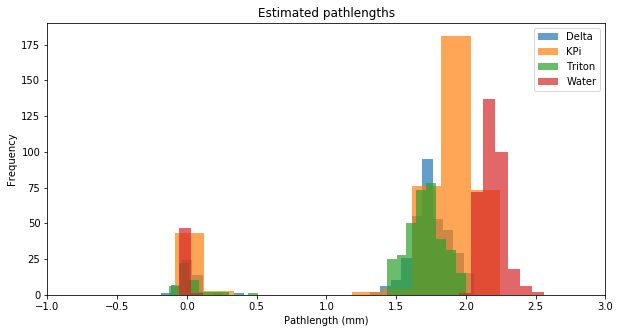

In [2]:
from PathLength import PlatePathlength

files = ['pathlength_delta.CSV',\
         'pathlength_KPiNormal.CSV',\
         'pathlength_TritonNormal.CSV',\
         '20191202_pathlength_water.CSV']

K_values = [K_kpiDMSO,K_kpiDMSO, K_kpiDMSO, K_water]


plt.figure(figsize = (10,5))

for i,j in zip(files,K_values):
    data = PlatePathlength(i,j)
    plengths = data.Pathlength()
    plt.hist(plengths, bins = 30, alpha = 0.7)
    
plt.title('Estimated pathlengths')
plt.legend(['Delta','KPi','Triton', 'Water'])
plt.xlabel('Pathlength (mm)')
plt.ylabel('Frequency')
plt.xlim((-1,3))
plt.show()

This looks worrying. The pathlength measurements on everythin but the water were taken after about an hour of sitting, so the lower pathlength may be due in part to evaporation.

Next I'll see if certain wells are repeat offenders.

pathlength_delta.CSV


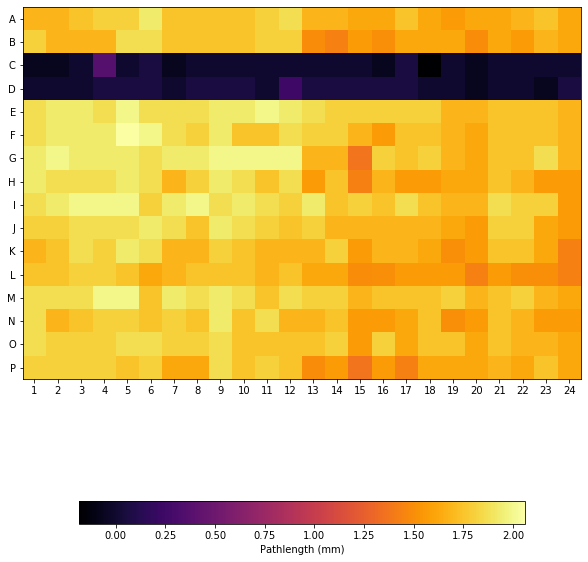

pathlength_KPiNormal.CSV


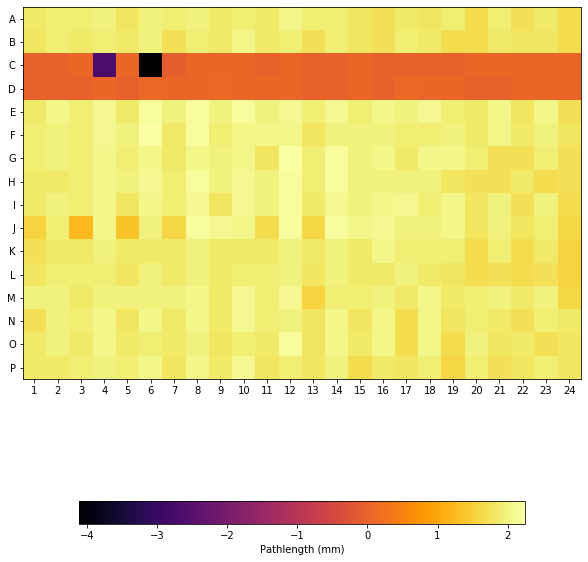

pathlength_TritonNormal.CSV


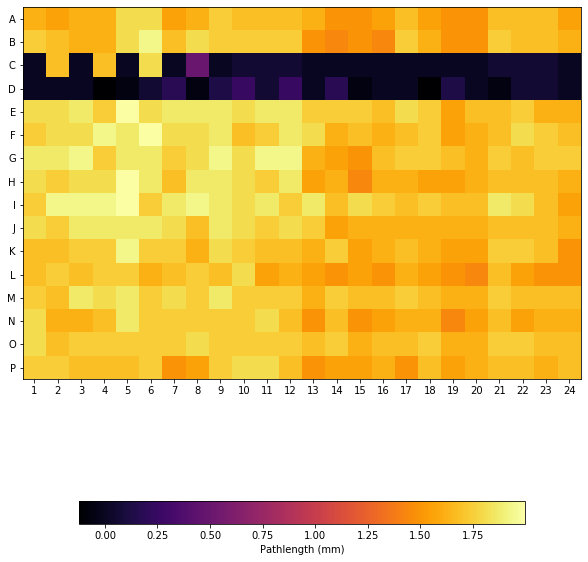

20191202_pathlength_water.CSV


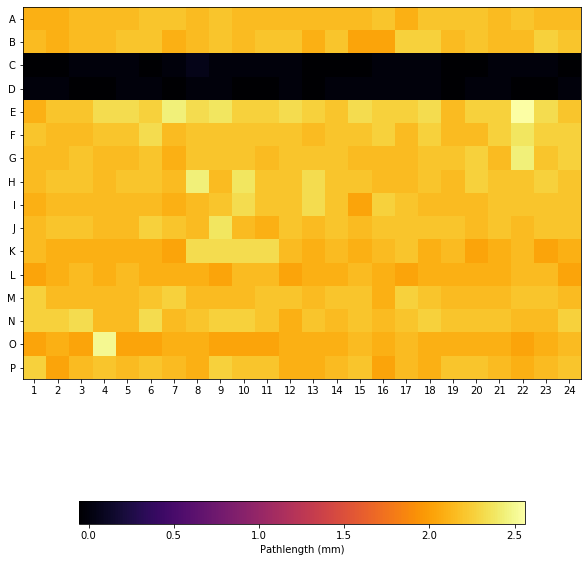

In [5]:
for i,j in zip(files,K_values):
    data = PlatePathlength(i,j)
    print(i)
    data.PlotPlatePathlenghs()


Looks like a blockage in nozze b. I'll try to unblock it.

20191202_pathlength_water_2.CSV


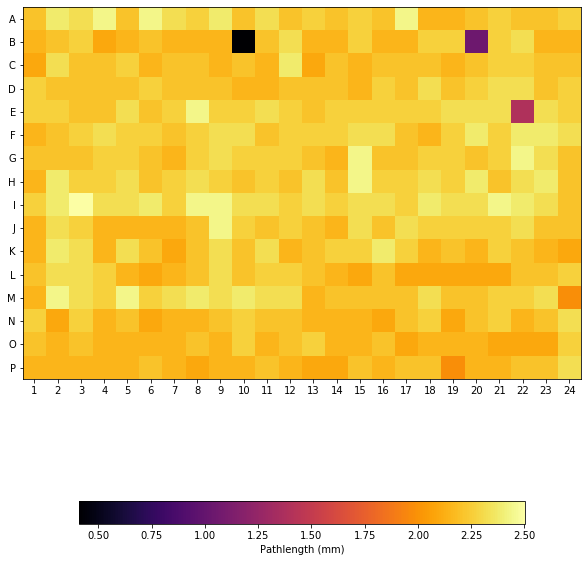

In [6]:
data = PlatePathlength('20191202_pathlength_water_2.CSV',K_water)
print('20191202_pathlength_water_2.CSV')
data.PlotPlatePathlenghs()

I'll check tomorrow if protein affects the K value and write in something that can correct for the new path length in each cell.